# <회귀 심화>

## 0. 간단 리뷰

- 지도학습: 정답 데이터 O
- 비지도학습: 정답 데이터 X

- 단순선형회귀: 독립변수 1개
- 다중선형회귀: 독립변수 2개 이상 

- 최적의 회귀선 찾는 법: 최소자승법(OLS)

- 회귀 분석 과정: 데이터 탐색 & 전처리 -> 모델 생성, 학습 -> 모델 평가 -> 모델 개선

## 1. 선형회귀

<span style='background-color: #ff009dff'>1-1. 다중선형회귀 수식</span>
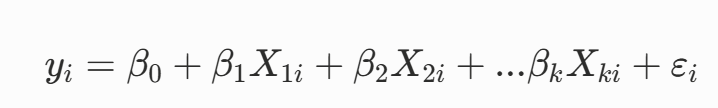
- X: 설명변수 (y에 영향 줄 것 같은 변수)
- 종속변수 y에 대한 설명변수의 !가중평균!
- X 높을수록 설명 정도 높음

<span style='background-color: #ff009dff'>1-2. 다중선형회귀 기본가정</span>
### 1. 선형성(linearity)
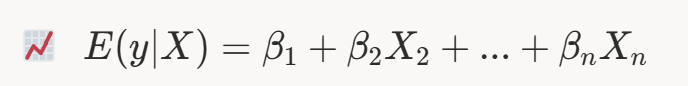
- 종속변수 - 설명변수: 선형적 관계
- 선형회귀니까 당연...
- 회귀 분석 전/후 검증 O

### 2. 독립성(independence)
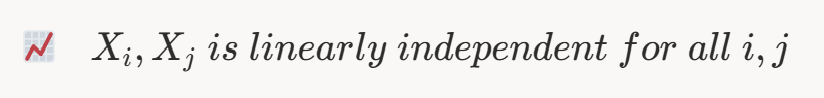
- 각 설명변수: 선형독립적 = 다중공선성 X
- 상관계수, VIF 통해 다중공선성 판단 -> 변수 제거, 규제선형모델, PCA로 대처
- 회귀 분석 전/후 검증 O

### 3. 오차항의 평균은 0이다
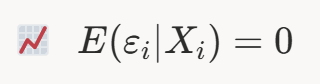
- 오차항(엡실론): 실제값 <-> 예측값 차이
- 백색 잡음 성질 만족! (특정 방향에 치우치지 X)
- 회귀 분석 후 검증 O

### 4. 등분산성(Homoscedasticity)
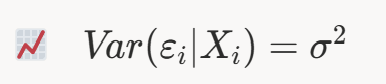
- 오차항의 분산 일정! (일정 X = 이분산성)
- 횡단면 자료에서 많이 나타남
- 일부 구간에서 오차가 커지는 상황 방지
- 잔차 도표화, 검정 통해 확인
- 회귀 분석 후 검증 O

### 5. 오차항은 자기상관되어 있지 않다(non-autocorrelation)
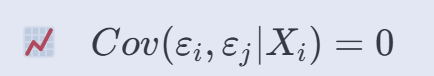
- 오차항 공분산 = 0 (독립적 관계)
- 자기상관: 현재 - 과거 값 상관관계 O
    => 랜덤 예측 X, 이전 패턴 학습 -> 반복적 오류!
- 회귀 분석 전/후 검증 O

### 6. 정규성(normality) (선택)
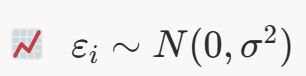
- 오차항 -> 정규분포 따름
- 회귀계수에 사용되는 공식 -> 정규분포 가정 후 만들어짐
- 샤피로-월크 검정, 자퀴-베라 검정, Q-Q plot 찍어보기
- 회귀 분석 후 검증 O

<span style='background-color: #ff009dff'>1-3. 회귀분석 평가방법</span>
### 1. 시각화
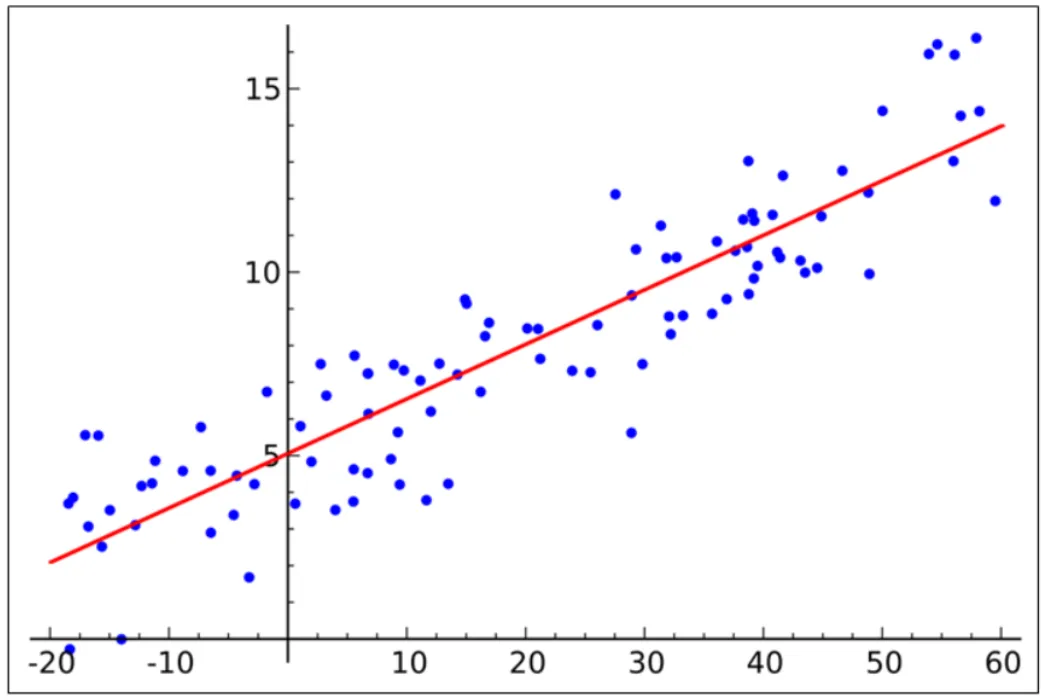
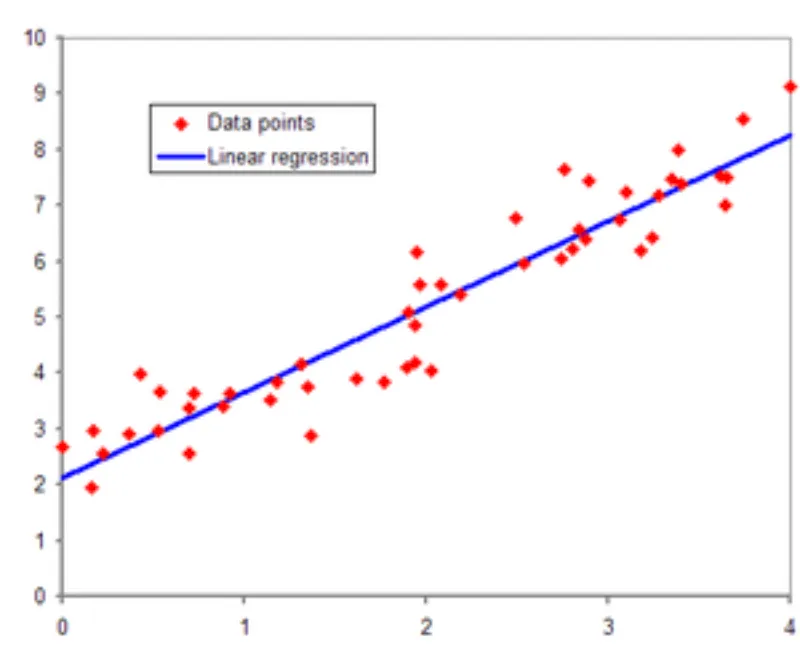
- 어떤 회귀선이 데이터를 잘 설명하는지 눈으로 판단 어려움

### 2. 통계지표
- 회귀선의 객관적 비교 위한 지표

#### 1. 유의성 검정
1. F-검정
- 전체 모델에 대하여 회귀 모델이 유의미한지 검정
- p-value < 0.05 => 귀무가설 기각, 회귀 모델 유의미

2. T-검정
- 개별 변수에 대하여 특정 독립 변수가 유의미한지 검정
- p-value < 0.05 => 귀무가설 기각, 해당 변수 유의미

#### 2. 성능 평가
1. 결정 계수 (R-squared)
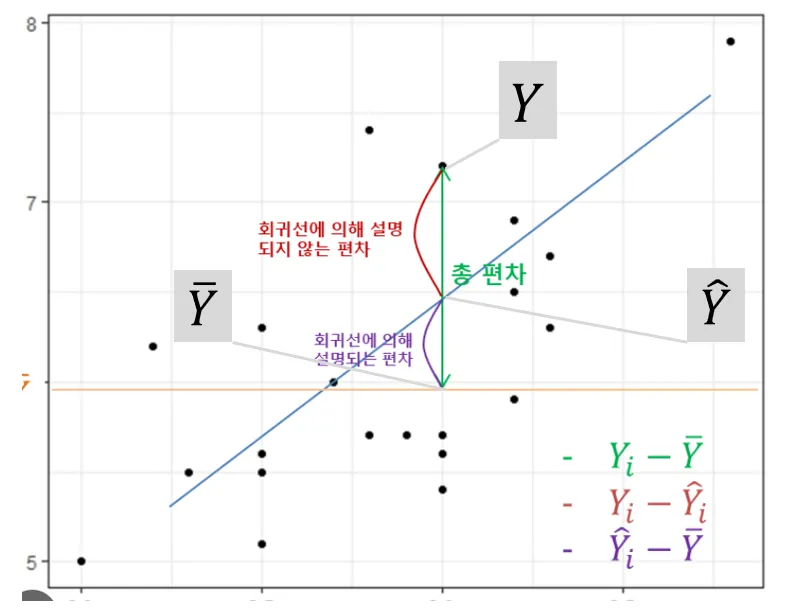
- 회귀선에 의해 설명되는 편차의 비율 (0~1)
    => 예측값보다 모델 사용 시 얼마나 더 정확한 예측인지!     
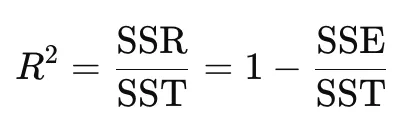
- SST: 총 편차, SSR: 회귀선에 의해 설명됨, SSE: 회귀선에 의해 설명X
- 0(설명 못함) <-> 1(설명 잘함)

2. 조정된 결정 계수(Adjusted R-sqaured)
- R-squred의 한계; 독립 변수 증가 -> 데이터와 큰 관련 없더라도 잔차를 줄이거나 그대로 유지하려는 특성 -> R^2 증가
    => 변수 개수 증가에 덜 민감하게 조정!
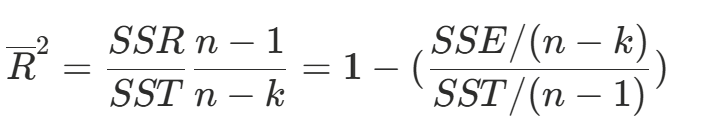
- k 증가 -> 전체 값 감소
- (n-1/n-k) 곱함: k에 따른 penalty 부여

3. AIC, BIC (정보기준)
- AIC(Akaike information criterion): 비교적 패널티 작음
- BIC(Bayesian Information Criterion): 비교적 기준 엄격, n에 따른 패널티



## 2. 비선형 회귀

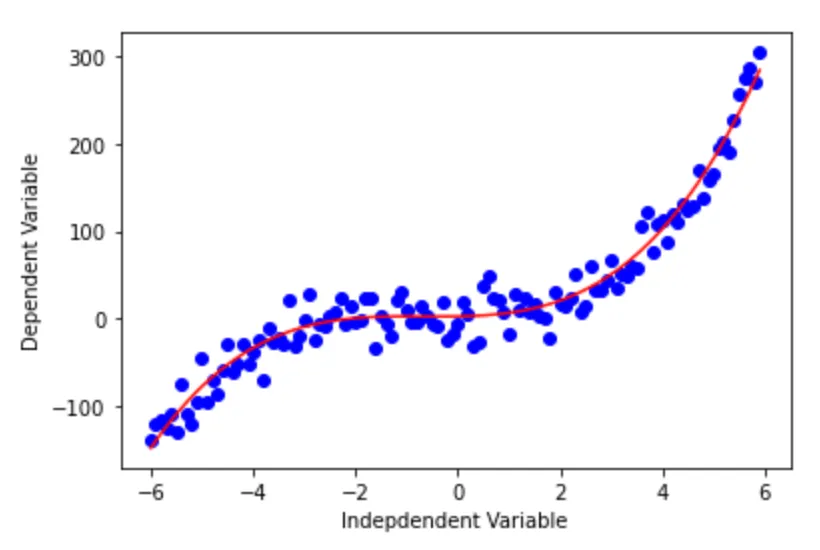
- 데이터 분포: 비선형적!

<span style='background-color: #ff009dff'>2-1. 다항식 회귀모델(Polynomial regression model)</span>
- 시간에 따라 변화하는 속도 다른 경우 등에 사용 (곡선 분포)     
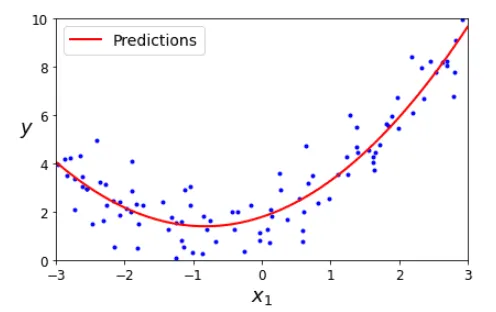
- 기존 선형 회귀에 거듭제곱 항 추가 -> 선형 회귀 적용           
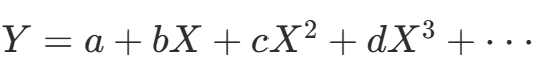
- 기존 변수를 다항식으로 만들고 회귀 적용!
<pre><code>
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
</code></pre>
- 장점: 선형 모델보다 더 적합한 회귀선 그림
- 단점: feature가 너무 많으면 과적합 가능성

<span style='background-color: #ff009dff'>2-2. 지수 회귀모델(Exponential model)</span>
- 시간에 따라 지수적으로 값이 증가, 감소 경우 등에 사용 (지수함수 분포)
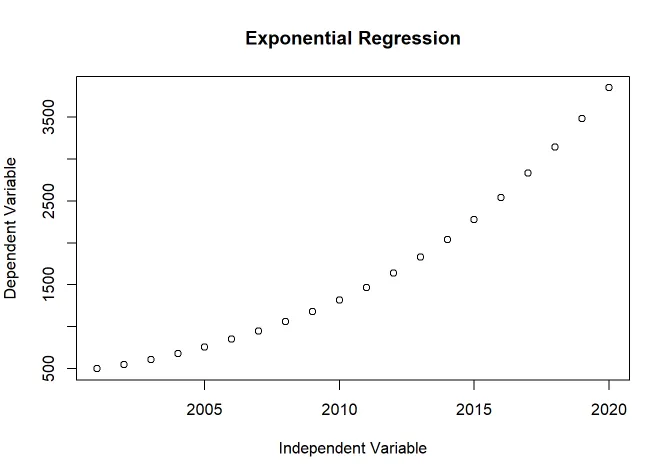
- $Y = ae^{bX}$ -> 양변에 로그 취함 -> $\ln Y=\ln a+bX$
    => Y에 로그 취한 후 선형 회귀 적용한 식과 형태 같음!      
    => 원래 데이터 형태로 복구: 지수함수 적용
<pre><code>
log_Y = np.log(Y) // 종속변수(Y)에 로그 취함         
Y_pred = np.exp(log__Y_pred) // exp 적용한 예측값 반환
</code></pre>

<span style='background-color: #ff009dff'>2-3. 로그 회귀모델(log regression model)</span>
- 초기: 빠른 증가, 후기: 증가율 감소 경우 등에 사용 (로그함수 분포)
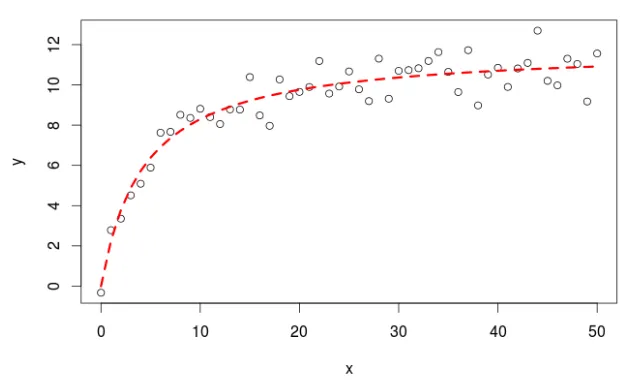
- $Y=a+b\log(X)$: X에 로그 취한 후 선형 회귀 적용
<pre><code>
log_X = np.log(X) // 독립변수(X)에 로그 취함
</code></pre>

<span style='background-color: #ff009dff'>2-4. 스플라인 회귀(Spline Regression)</span>
- 데이터 패턴이 여러 구간에 걸쳐 다르게 분포하는 경우 등에 사용
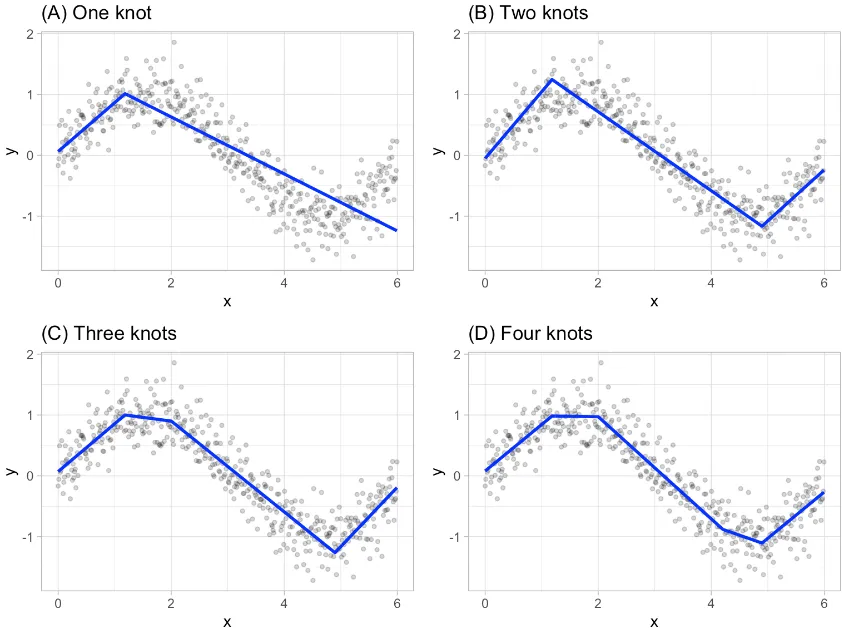
- 구간별로 별도의 회귀 모델 적용           
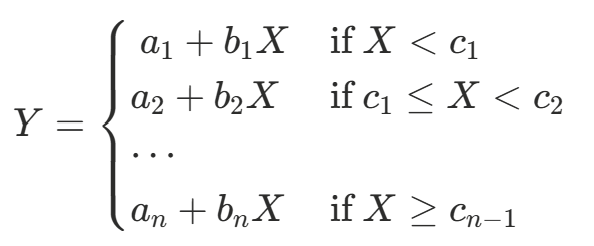
- 구간 경계 연속성 유지 중요! (전체적으로 끊기면 안됨)
<pre><code>
X_spline = dmatrix("bs(X, df=5, degree=3, include_intercept=False)", 
{"X": X}, return_type='dataframe')            
// df로 구간 수 지정, degree로 회귀 모델 차수 결정
</code></pre>

## 3. 정리
1. 데이터 탐색, 전처리
2. 회귀 분석 기본 가정 6가지 확인
3. 모델 생성, 학습
4. 모델 유의성 검정 (F-검정, T-검정)
5. 모델 성능 평가 (R-squred, Adusted R-squared)
6. 모델 성능 개선 (비선형 모델 활용)